Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

Listing of attributes:
Labels : >50K, <=50K.

age: continuous. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. fnlwgt: continuous. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. education-num: continuous. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. sex: Female, Male. capital-gain: continuous. capital-loss: continuous. hours-per-week: continuous. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
adults = pd.read_csv('/Users/kaushikganguly/Downloads/adult.csv',names=['Age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','label'])
adults_test = pd.read_csv('/Users/kaushikganguly/Downloads/adult.csv',names=['Age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','label'])

In [3]:
train_data = adults.drop('label',axis=1)

test_data = adults_test.drop('label',axis=1)

data = train_data.append(test_data)

label = adults['label'].append(adults_test['label'])

In [4]:
data.head(5)

,Age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [5]:
full_dataset = adults.append(adults_test)

In [6]:
label.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: label, dtype: object

In [7]:
data_binary = pd.get_dummies(data)
data_binary.head()

,Age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
x_train, x_test, y_train, y_test = train_test_split(data_binary,label)

In [9]:
performance = []

In [10]:
# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

In [11]:
GNB.fit(x_train, y_train)
train_score = GNB.score(x_train, y_train)
test_score = GNB.score(x_test, y_test)

print(f'Gaussian Naive Bayes : Training score - {train_score} - Test score - {test_score}')
performance.append({'algorithm':'Gaussian Naive Bayes', 'training_score':train_score, 'testing_score':test_score})

Gaussian Naive Bayes : Training score - 0.7960320222763662 - Test score - 0.7919046741600638


In [13]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression

logClassifier = LogisticRegression()

In [14]:
logClassifier.fit(x_train,y_train)
train_score = logClassifier.score(x_train,y_train)
test_score = logClassifier.score(x_test,y_test)

print(f'LogisticRegression : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'LogisticRegression', 'training_score':train_score, 'testing_score':test_score})

LogisticRegression : Training score - 0.7988779918511087 - Test score - 0.7955285301885634


In [15]:
# K Nearest Neighbours

from sklearn.neighbors import KNeighborsClassifier
knn_scores = []

train_scores = []
test_scores = []

KNN : Training score - 1.0 -- Test score - 0.9313309993243658
KNN : Training score - 0.9467660367314347 -- Test score - 0.7713899637614398
KNN : Training score - 0.8648266825003583 -- Test score - 0.8149990786806707
KNN : Training score - 0.8481398824757888 -- Test score - 0.7900006142128861
KNN : Training score - 0.8333981695706476 -- Test score - 0.7999508629691051
KNN : Training score - 0.8255359226879057 -- Test score - 0.7978625391560715
KNN : Training score - 0.819168321696935 -- Test score - 0.8000122842577237
KNN : Training score - 0.8176941504064208 -- Test score - 0.8007493397211474
KNN : Training score - 0.8142544173952212 -- Test score - 0.8005036545666728
KNN : Training score - 0.8126164492946499 -- Test score - 0.8018549229162828


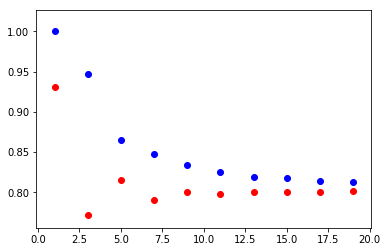

In [16]:
for n in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train,y_train)
    train_score = knn.score(x_train,y_train)
    test_score = knn.score(x_test,y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'KNN : Training score - {train_score} -- Test score - {test_score}')
    knn_scores.append({'algorithm':'KNN', 'training_score':train_score})
    
plt.scatter(x=range(1, 20, 2),y=train_scores,c='b')
plt.scatter(x=range(1, 20, 2),y=test_scores,c='r')

plt.show()

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

knn.score(x_train,y_train)

train_score = knn.score(x_train,y_train)
test_score = knn.score(x_test,y_test)

print(f'K Neighbors : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'K Neighbors', 'training_score':train_score, 'testing_score':test_score})

K Neighbors : Training score - 0.8648266825003583 - Test score - 0.8149990786806707


In [18]:
performance

[{'algorithm': 'Gaussian Naive Bayes',
  'testing_score': 0.7919046741600638,
  'training_score': 0.7960320222763662},
 {'algorithm': 'LogisticRegression',
  'testing_score': 0.7955285301885634,
  'training_score': 0.7988779918511087},
 {'algorithm': 'K Neighbors',
  'testing_score': 0.8149990786806707,
  'training_score': 0.8648266825003583}]

In [19]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rndTree = RandomForestClassifier()
rndTree.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
rndTree.score(x_test,y_test)

0.9503101775075241

In [21]:
rndTree.score(x_train,y_train)

0.9964578939825147

In [22]:
train_score = rndTree.score(x_train,y_train)
test_score = rndTree.score(x_test,y_test)

print(f'Random Forests : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'Random Forests', 'training_score':train_score, 'testing_score':test_score})

Random Forests : Training score - 0.9964578939825147 - Test score - 0.9503101775075241


In [23]:
# Support Vector Machine

from sklearn import svm

svc = svm.SVC(kernel='linear')


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_binary,label)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

svc.fit(x_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
svc.score(x_test_scaled,y_test)

0.8533259627786991